In [2]:
# Importing necessary libraries and modules for data analysis and visualization
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os
import sys
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
import statsmodels.nonparametric.kernel_regression as loess
warnings.filterwarnings("ignore") # Disabling warnings to prevent cluttering the output
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
#Locate the folder
current_path = os.getcwd()
#import Data
data_all = pd.read_csv(current_path+ "\morg-2014-emp.csv")

In [7]:
#Reviewing the head of the Data
data_all.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


Choosing Biological scientist as the occupation of interest

In [8]:
#Setting the column called sample as 1 in cases where it is of the occupation of interest for us otherwise 0
data_all.loc[data_all["occ2012"] == 1610, "sample"] = 1
data_all.loc[data_all["sample"].isna(), "sample"] = 0

In [9]:
#seeing the description of our sample
data_all[data_all["sample"] == 1].describe()

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012,sample
count,155.000000,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000,5.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0,155.0
mean,160899.554839,4.446691e+14,1855.869986,1284.034645,41.651613,43.941935,1.341935,2.000000,42.993548,1.458065,2.851613,0.703226,1.703226,1610.0,1.0
std,94917.066970,3.179364e+14,1372.855396,654.399530,7.286880,1.275334,0.893255,1.224745,11.468476,0.499853,2.684234,1.039319,2.952380,0.0,0.0
min,416.000000,2.101078e+11,260.656100,150.000000,16.000000,39.000000,1.000000,1.000000,21.000000,1.000000,1.000000,0.000000,0.000000,1610.0,1.0
25%,79114.500000,1.371727e+14,496.157550,807.690000,40.000000,43.000000,1.000000,1.000000,34.500000,1.000000,1.000000,0.000000,0.000000,1610.0,1.0
50%,157370.000000,4.107100e+14,1478.810100,1195.650000,40.000000,44.000000,1.000000,2.000000,41.000000,1.000000,1.000000,0.000000,0.000000,1610.0,1.0
75%,246786.500000,7.390949e+14,3088.489100,1633.630000,40.000000,44.000000,1.000000,2.000000,53.000000,2.000000,7.000000,1.000000,3.000000,1610.0,1.0
max,316773.000000,9.820600e+14,5431.490700,2884.610000,80.000000,46.000000,4.000000,4.000000,64.000000,2.000000,7.000000,5.000000,14.000000,1610.0,1.0


Checking the number of observations with the occupation of interest and in comparison to the rest

In [10]:
#counting the number of 0 and 1 in column sample
data_all["sample"].value_counts()

sample
0.0    149161
1.0       155
Name: count, dtype: int64

Cleaning Data and working with on the missing values

In [12]:
#checking the columns with missing values
nan_columns = data_all.columns[data_all.isna().any()].tolist()
print(nan_columns)
# The number of missing observations under column ethnic
nan_count_ethnic = data_all["ethnic"].isna().sum()
print(nan_count_ethnic)
nan_count_unioncov = data_all["unioncov"].isna().sum()
print(nan_count_unioncov)

['ethnic', 'unioncov']
129245
17096


Given the number of missing values in relation to the total number of observations, we decided to drop these columns

In [13]:
#Dropping the columns with missing values
data_all = data_all.drop(columns=["ethnic","unioncov" ])

Focusing on the occupation of choice: Biological scientist

In [14]:
#Only keeping the observations with the occupation of our choice
data_all = data_all[data_all["sample"] == 1]

In [15]:
#dropping the column Sample as it does not have any function for us now
data_all = data_all.drop(columns=["sample"])

Here we check the type of values under each column. Object columns and categorical data need to be worked on. 

In [16]:
#checking the types of the values under all columns
print(data_all.dtypes)

Unnamed: 0      int64
hhid            int64
intmonth       object
stfips         object
weight        float64
earnwke       float64
uhours          int64
grade92         int64
race            int64
age             int64
sex             int64
marital         int64
ownchild        int64
chldpres        int64
prcitshp       object
state          object
ind02          object
occ2012         int64
class          object
unionmme       object
lfsr94         object
dtype: object


In [17]:
#checking all possible values of column intmonth
unique_values = data_all["intmonth"].unique()
print(unique_values)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [18]:
#producing dummy variables for months  in columns intmonth, and and US states in stfips, and other variables such as industry, calss, union membership and coverage, employment status and State
data_all_adjusted = pd.get_dummies(data_all, columns=["intmonth", "stfips", "state", "ind02", "class","unionmme", "lfsr94"], drop_first=True)


In [19]:
#checking all possible values of column prcitshp
unique_values = data_all["prcitshp"].unique()
print(unique_values)

['Foreign Born, Not a US Citizen' 'Native, Born In US'
 'Foreign Born, US Cit By Naturalization'
 'Native, Born Abroad Of US Parent(s)'
 'Native, Born in PR or US Outlying Area']


For this variable, only the issue of US citizenship is of interest for us

In [20]:
#we make a dummy based on citizenship
data_all_adjusted["native_dummy"] = data_all_adjusted["prcitshp"].isin([
    "Native, Born In US",
    "Native, Born Abroad Of US Parent(s)",
    "Native, Born in PR or US Outlying Area"
]).astype(int)
data_all_adjusted = data_all_adjusted.drop(columns=["prcitshp"])

In [21]:
#we want to transform the column race because in the current way it is not meaningful
data_all_adjusted = pd.get_dummies(data_all_adjusted, columns=["race"], drop_first=True)

In [22]:
print(data_all_adjusted.columns.tolist())

['Unnamed: 0', 'hhid', 'weight', 'earnwke', 'uhours', 'grade92', 'age', 'sex', 'marital', 'ownchild', 'chldpres', 'occ2012', 'intmonth_August', 'intmonth_December', 'intmonth_February', 'intmonth_January', 'intmonth_July', 'intmonth_June', 'intmonth_March', 'intmonth_May', 'intmonth_November', 'intmonth_October', 'intmonth_September', 'stfips_AR', 'stfips_AZ', 'stfips_CA', 'stfips_CO', 'stfips_CT', 'stfips_DC', 'stfips_DE', 'stfips_FL', 'stfips_GA', 'stfips_HI', 'stfips_IA', 'stfips_ID', 'stfips_IL', 'stfips_IN', 'stfips_KS', 'stfips_MA', 'stfips_MD', 'stfips_ME', 'stfips_MN', 'stfips_MO', 'stfips_MS', 'stfips_MT', 'stfips_NC', 'stfips_ND', 'stfips_NE', 'stfips_NH', 'stfips_NJ', 'stfips_NM', 'stfips_NV', 'stfips_NY', 'stfips_OH', 'stfips_OR', 'stfips_PA', 'stfips_RI', 'stfips_SD', 'stfips_TX', 'stfips_UT', 'stfips_VA', 'stfips_VT', 'stfips_WA', 'stfips_WY', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_7', 'state_8', 'state_9', 'state_1', 'state_2', 'state_3', 'state_4'

In [23]:
#calculate earnings per hour
data_all_adjusted["w"] = data_all_adjusted["earnwke"] / data_all_adjusted["uhours"]

Based on the informed decisions about the context, some transformations of the variables are also included

In [24]:
#Transformations and possible interaction terms
data_all_adjusted["age_sq"] = data_all_adjusted["age"] ** 2
data_all_adjusted["ln_age"] = np.log(data_all_adjusted["age"])
data_all_adjusted["ln_uhours"] = np.log(data_all_adjusted["uhours"])
data_all_adjusted["uhours_sq"] = data_all_adjusted["uhours"] ** 2
data_all_adjusted["ln_weight"] = np.log(data_all_adjusted["weight"])
data_all_adjusted["weight_sq"] = data_all_adjusted["weight"] ** 2
data_all_adjusted["age_weight_interaction"] = data_all_adjusted["age"] * data_all_adjusted["weight"]
data_all_adjusted["age_sex_interaction"] = data_all_adjusted["age"] * data_all_adjusted["sex"]

Now we want to check the relation of some of the variables of choice based on the informed choice

In [26]:
#choosing some variables to observe their relations
selected_columns = ['age_sex_interaction','ln_age','age_sq','ln_weight', 'weight','weight_sq','uhours_sq','ln_uhours','w','age', 'stfips_DE', 'grade92', 'ind02_Management, scientific, and technical consulting services (5416)','stfips_CA']

In [27]:
# Let's compute the correlation coefficients
corr = data_all_adjusted[selected_columns].corr(method=lambda x, y: pearsonr(x, y)[0])

# Let's compute the the p-values
pvalues = data_all_adjusted[selected_columns].corr(method=lambda x, y: pearsonr(x, y)[1])

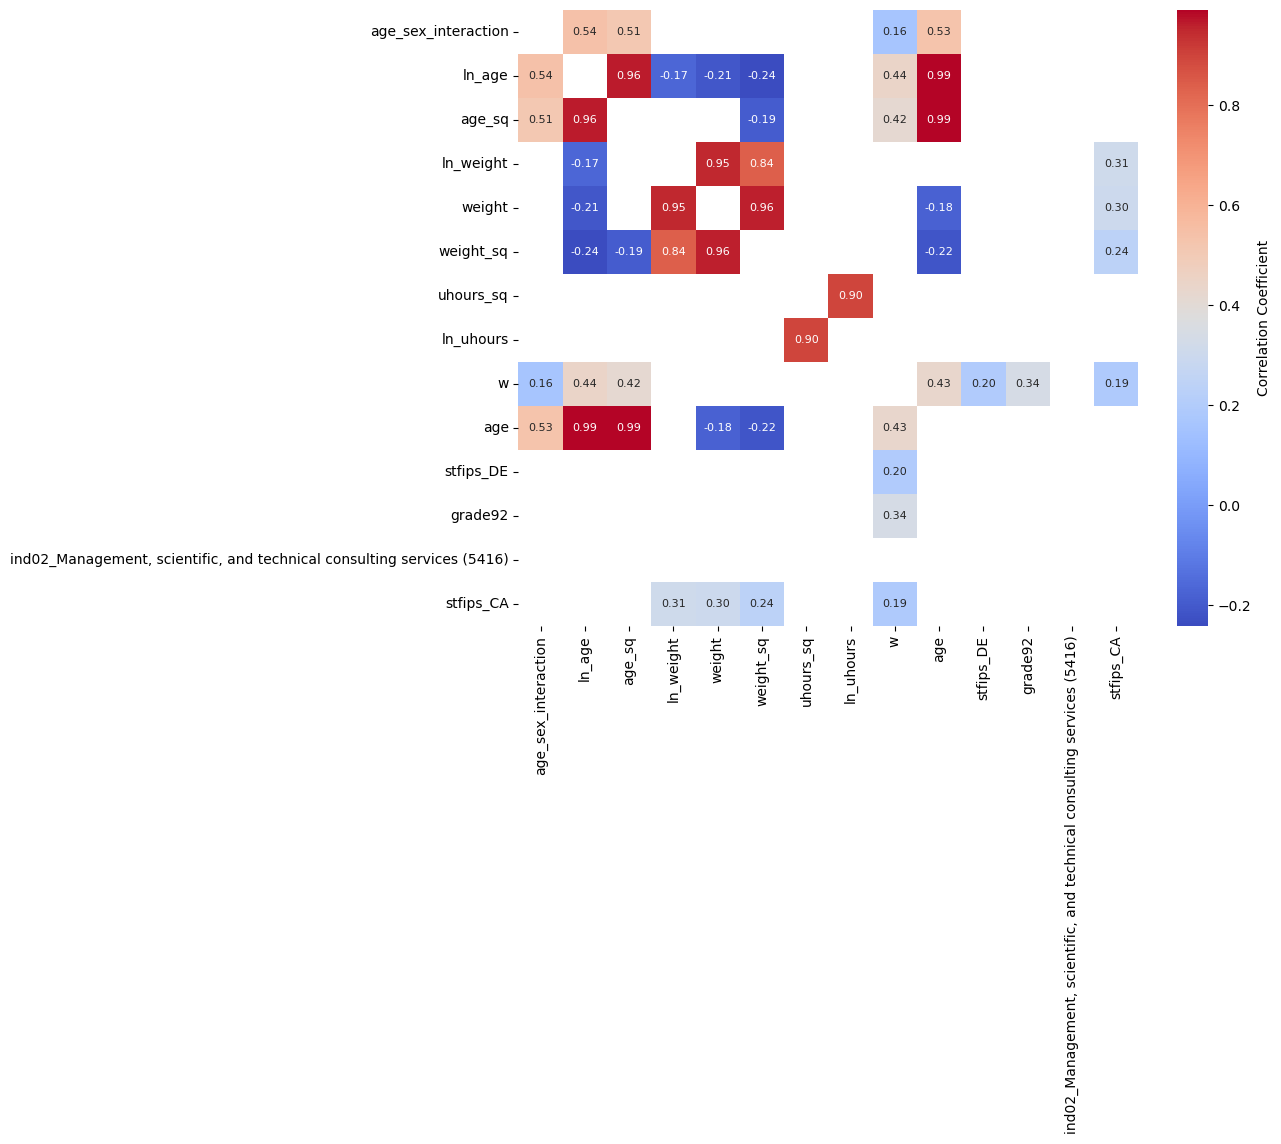

In [28]:
# Create a mask to show only statistically significant correlations (e.g., p-value < 0.05)
mask_significant = pvalues < 0.05
plt.figure(figsize=(10, 8))
# Plot the correlation heatmap with only significant values
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=~mask_significant, annot_kws={"size": 8}, cbar_kws={'label': 'Correlation Coefficient'})
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight') 
plt.show()

In [ ]:
# Create a mask to show only statistically significant correlations (e.g., p-value < 0.05)
mask_significant = pvalues < 0.05
plt.figure(figsize=(10, 8))
# Plot the correlation heatmap with only significant values
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=~mask_significant, annot_kws={"size": 8}, cbar_kws={'label': 'Correlation Coefficient'})
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight') 
plt.show()

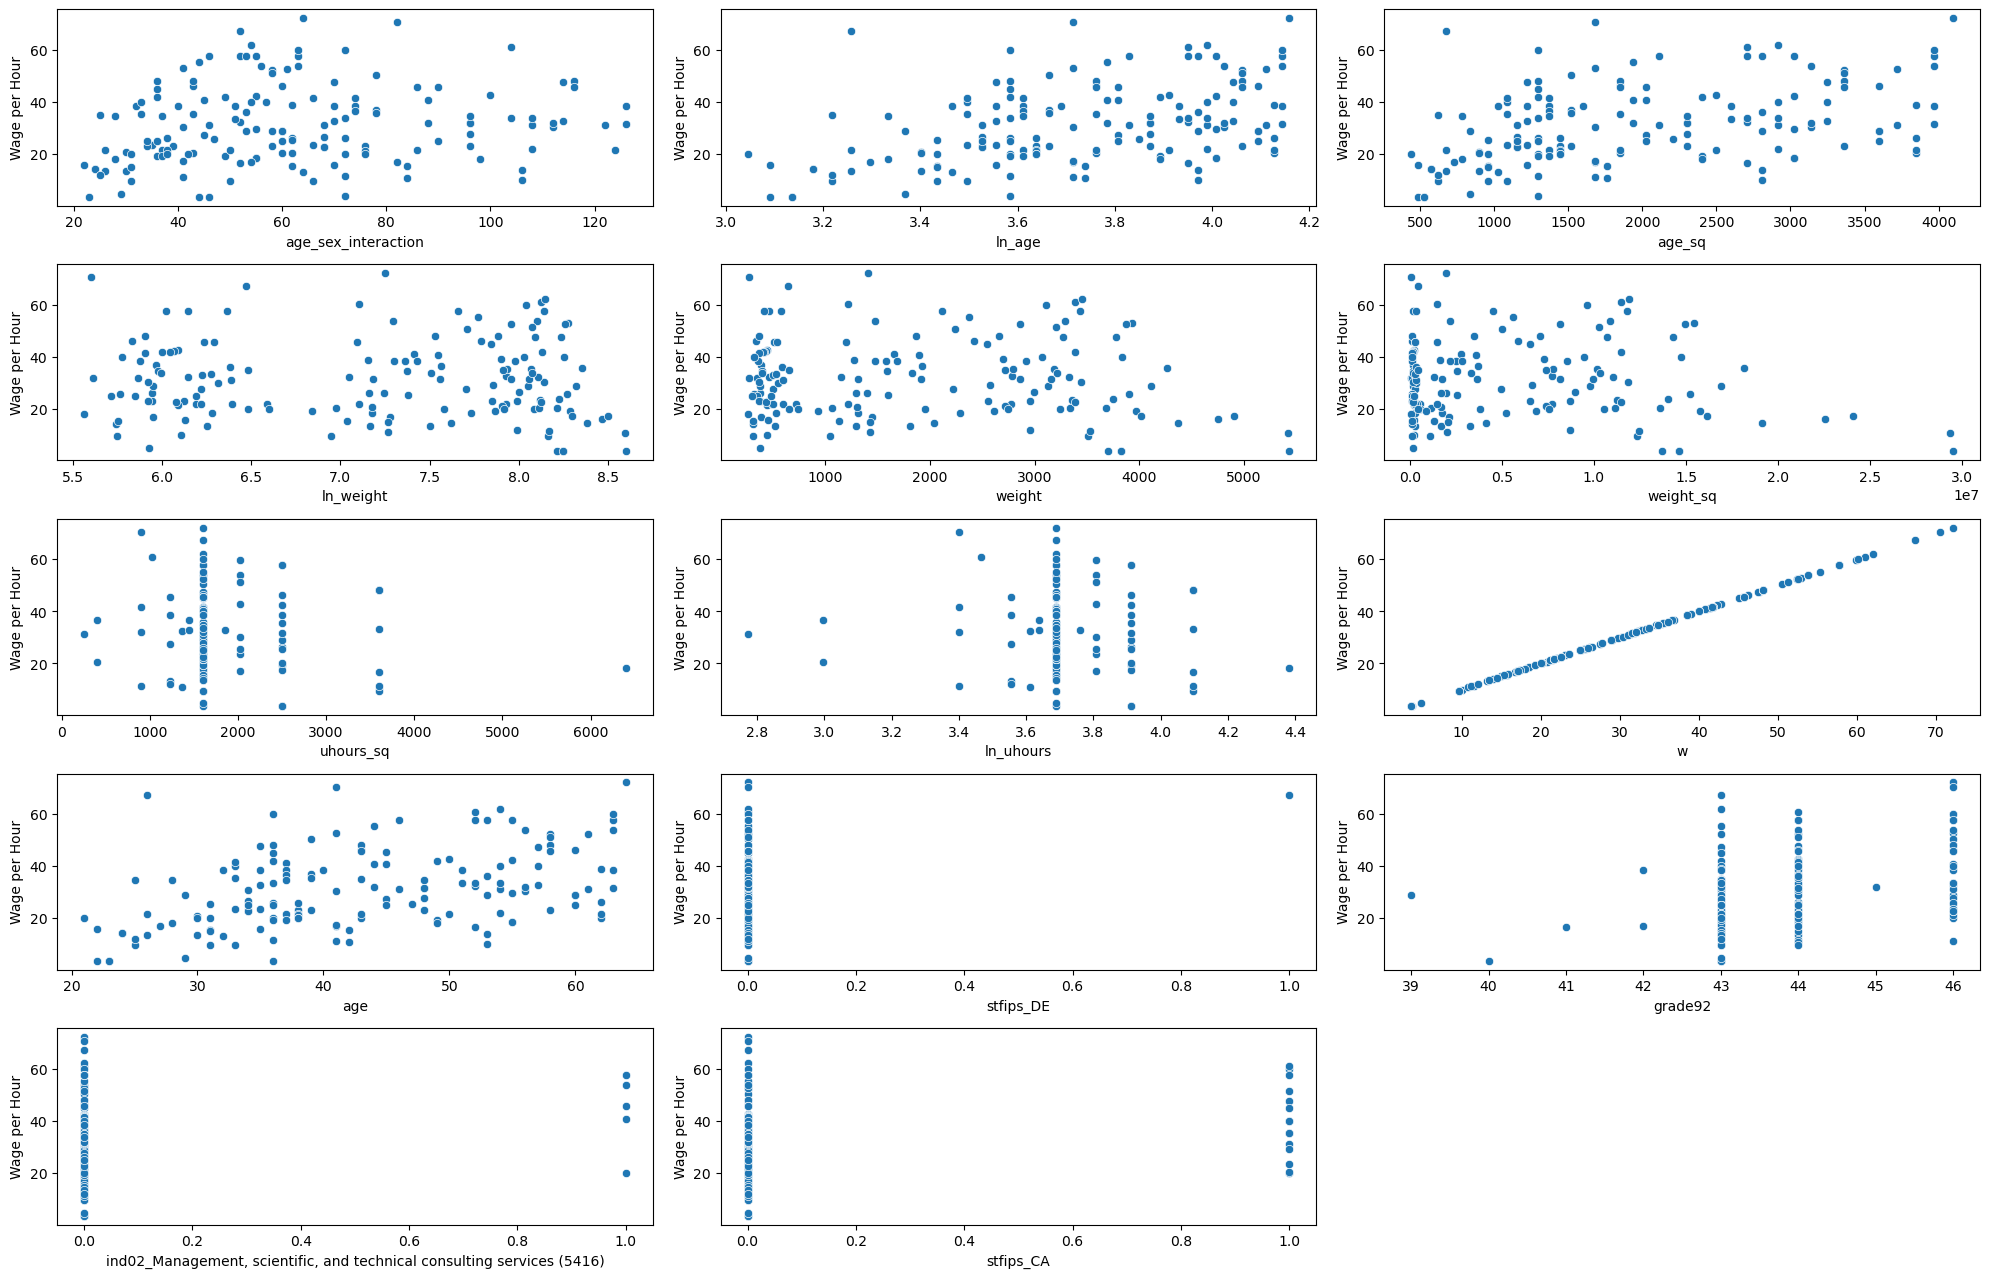

In [29]:
# Let's first visualize correlations between hourly wage and the other variables
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data_all_adjusted[selected_columns].columns[:]):
    plt.subplot(6, 3, i+1)
    sns.scatterplot(data=data_all_adjusted[selected_columns], x=feature, y='w')
    plt.xlabel(feature)
    plt.ylabel('Wage per Hour')
plt.tight_layout()
plt.savefig("corr-visual.png", dpi=300, bbox_inches="tight")
plt.show()

Now we run an informal step of LASSO to find some of the variables that might be included in our models

In [30]:
# Prepare the data (replace 'target' with your actual target column name)
X = data_all_adjusted.drop(columns=['w','earnwke','uhours'])  # Features
y = data_all_adjusted['w']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize LassoCV (cross-validation for alpha selection)
lasso_cv = LassoCV(cv=5, max_iter=10000)

# Fit LassoCV to the training data
lasso_cv.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso_cv.coef_

# Find the features with non-zero coefficients
selected_features = X.columns[coefficients != 0]

# If there are more than 20, sort by the absolute value of coefficients and select the top 20
if len(selected_features) > 20:
    top_20_features = sorted(zip(coefficients, X.columns), key=lambda x: abs(x[0]), reverse=True)[:20]
    top_20_features = [feature for _, feature in top_20_features]
else:
    top_20_features = selected_features.tolist()  # Convert to list if fewer than 20

# Print the 20 most important features
print("Top 20 most important features:", top_20_features)

Top 20 most important features: ['grade92', 'marital', 'stfips_DE', 'state_5', 'state_2', 'state_9', 'state_OH', 'ind02_Management, scientific, and technical consulting services (5416)', 'ind02_Other schools, instruction, and educational services (6116, 6117)', 'ln_age']


In [31]:
#changing the column names to avoid problems in regression
data_all_adjusted = data_all_adjusted.rename(columns={
    "ind02_Hospitals (622)": "ind02_Hospitals",
    "ind02_Other schools, instruction, and educational services (6116, 6117)": "ind02_Education",
    "class_Private, Nonprofit": "class_Private_Nonprofit",
    "ind02_Pharmaceutical and medicine manufacturing (3254)": "ind02_Pharmaceutical_and_medicine_manufacturing_3254",
    "ind02_Management, scientific, and technical consulting services (5416)": "ind02_Management_scientific_and_technical_consulting_5416",
    "ind02_Colleges and universities, including junior colleges (6112, 6113)": "ind02_Colleges_and_universities_6112_6113",
    "ind02_National security and international affairs (928)": "ind02_National_security_and_international_affairs_928"
})

Choosing the Models

In [32]:
#only including age and grade
reg1 = smf.ols(formula="w~ln_age+ grade92", data=data_all_adjusted).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     25.07
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           3.89e-10
Time:                        23:27:30   Log-Likelihood:                -614.07
No. Observations:                 155   AIC:                             1234.
Df Residuals:                     152   BIC:                             1243.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -194.3561     38.455     -5.054      0.000    -269.726    -118.986
ln_age        21.5159      3.788      5.680      0.000      14.091      28.941
grade92        3.3063      0.831      3.977      0.000       1.677       4.936
==============================================================================
Omnibus:                       11.582   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.925
Skew:                           0.634   Prob(JB):                      0.00257
Kurtosis:                       3.489   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#including some more of the variables detected by LASSO 
reg2 = smf.ols(formula="w ~ age+ grade92+ stfips_DC +intmonth_May + stfips_CT+ stfips_DC  + ind02_Hospitals + ind02_Education + class_Private_Nonprofit", data=data_all_adjusted).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     95.64
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           3.72e-54
Time:                        23:27:44   Log-Likelihood:                -608.32
No. Observations:                 155   AIC:                             1235.
Df Residuals:                     146   BIC:                             1262.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -117.0836     36.659     -3.194      0.001    -188.934     -45.233
stfips_DC[T.True]                  15.4609     10.520      1.470      0.142      -5.157      36.079
intmonth_May[T.True]                4.0378      6.070      0.665      0.506      -7.858      15.934
stfips_CT[T.True]                  -4.0153     10.247     -0.392      0.695     -24.098      16.068
ind02_Hospitals[T.True]            -4.9361      5.719     -0.863      0.388     -16.145       6.273
ind02_Education[T.True]            -9.6819      3.769     -2.569      0.010     -17.068      -2.295
class_Private_Nonprofit[T.True]    -6.0356      3.534     -1.708      0.088     -12.963       0.892
age                                 0.4625      0.103      4.489      0.000       0.261       0.664
grade92                             2.9283      0.823      3.560      0.000       1.316       4.541
==============================================================================
Omnibus:                        9.822   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.874
Skew:                           0.597   Prob(JB):                      0.00718
Kurtosis:                       3.319   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#including non-linears and interaction terms
reg3 = smf.ols(formula="w ~grade92+ age+age_sq+weight_sq+age_sex_interaction+age_weight_interaction+ stfips_DC +intmonth_May + stfips_CT+ stfips_DC  + ind02_Hospitals + ind02_Education + class_Private_Nonprofit", data=data_all_adjusted).fit(cov_type="HC1")

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.09
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           8.07e-25
Time:                        23:27:51   Log-Likelihood:                -605.04
No. Observations:                 155   AIC:                             1236.
Df Residuals:                     142   BIC:                             1276.
Df Model:                          12                                         
Covariance Type:                  HC1                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -109.8942     38.421     -2.860      0.004    -185.199     -34.590
stfips_DC[T.True]                  18.0039     10.147      1.774      0.076      -1.883      37.891
intmonth_May[T.True]                3.5064      6.616      0.530      0.596      -9.461      16.474
stfips_CT[T.True]                  -4.3433     10.924     -0.398      0.691     -25.755      17.068
ind02_Hospitals[T.True]            -4.9656      5.367     -0.925      0.355     -15.485       5.554
ind02_Education[T.True]            -9.6607      4.304     -2.244      0.025     -18.097      -1.224
class_Private_Nonprofit[T.True]    -4.1614      3.806     -1.093      0.274     -11.621       3.299
grade92                             2.8800      0.796      3.617      0.000       1.319       4.441
age                                 0.3000      0.912      0.329      0.742      -1.488       2.088
age_sq                              0.0003      0.010      0.026      0.979      -0.019       0.020
weight_sq                       -7.222e-07   3.84e-07     -1.883      0.060   -1.47e-06    2.95e-08
age_sex_interaction                -0.0383      0.046     -0.828      0.407      -0.129       0.052
age_weight_interaction           9.698e-05   4.18e-05      2.322      0.020    1.51e-05       0.000
==============================================================================
Omnibus:                        8.307   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.087
Skew:                           0.530   Prob(JB):                       0.0175
Kurtosis:                       3.360   Cond. No.                     3.15e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#include all the possibly important variables
reg4 = smf.ols(
    formula="w ~ age + age_sq + weight_sq + age_sex_interaction + age_weight_interaction + "
            "stfips_DC + intmonth_May + stfips_CT + ind02_Hospitals + ind02_Education + class_Private_Nonprofit + "
            "state_OH + ind02_National_security_and_international_affairs_928 + unionmme_Yes + race_4 + "
            "ind02_Colleges_and_universities_6112_6113 + state_46 + stfips_TX + state_RI + stfips_WY + stfips_OR + "
            "ind02_Management_scientific_and_technical_consulting_5416 + stfips_DE + stfips_MS + intmonth_March + "
            "ind02_Pharmaceutical_and_medicine_manufacturing_3254 + stfips_IA + stfips_IN",
    data=data_all_adjusted
).fit(cov_type="HC1")

reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                 5.445e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          4.24e-242
Time:                        23:28:02   Log-Likelihood:                -595.34
No. Observations:                 155   AIC:                             1247.
Df Residuals:                     127   BIC:                             1332.
Df Model:                          27                                         
Covariance Type:                  HC1                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           -11.9293     19.936     -0.598      0.550     -51.002      27.144
stfips_DC[T.True]                                                    19.1932      9.600      1.999      0.046       0.378      38.008
intmonth_May[T.True]                                                  7.3426      7.650      0.960      0.337      -7.652      22.337
stfips_CT[T.True]                                                    -2.5326      9.270     -0.273      0.785     -20.701      15.636
ind02_Hospitals[T.True]                                              -4.4104      6.734     -0.655      0.513     -17.610       8.789
ind02_Education[T.True]                                              -5.7783      2.912     -1.984      0.047     -11.486      -0.071
class_Private_Nonprofit[T.True]                                       0.4601      4.600      0.100      0.920      -8.556       9.476
state_OH[T.True]                                                     -5.7783      2.912     -1.984      0.047     -11.486      -0.071
ind02_National_security_and_international_affairs_928[T.True]       -13.3462      5.795     -2.303      0.021     -24.704      -1.988
unionmme_Yes[T.True]                                                  1.9744      2.843      0.694      0.487      -3.598       7.547
race_4[T.True]                                                       -3.2165      3.437     -0.936      0.349      -9.953       3.520
ind02_Colleges_and_universities_6112_6113[T.True]                     4.1955      4.270      0.983      0.326      -4.174      12.565
state_46[T.True]                                                    -12.6807      5.171     -2.452      0.014     -22.816      -2.545
stfips_TX[T.True]                                                     0.4268     10.169      0.042      0.967     -19.504      20.358
state_RI[T.True]                                                    -16.0757      6.416     -2.506      0.012     -28.650      -3.502
stfips_WY[T.True]                                                    -4.8405      4.364     -1.109      0.267     -13.394       3.713
stfips_OR[T.True]                                                     2.2539      3.857      0.584      0.559      -5.305       9.813
ind02_Management_scientific_and_technical_consulting_5416[T.True]    10.9154      6.375      1.712      0.087      -1.580      23.411
stfips_DE[T.True]                                                    62.1559      7.358      8.448      0.000      47.735      76.577
stfips_MS[T.True]                                                    19.3309      2.577      7.500      0.000      14.279      24.383
i

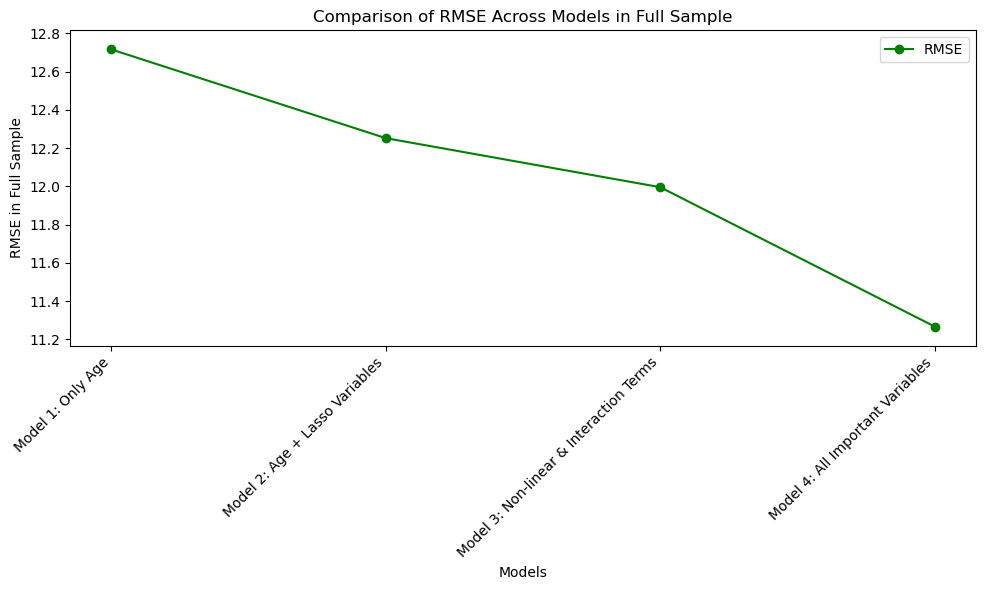

In [36]:
# Make predictions for each model
y_pred1 = reg1.predict(data_all_adjusted)
y_pred2 = reg2.predict(data_all_adjusted)
y_pred3 = reg3.predict(data_all_adjusted)
y_pred4 = reg4.predict(data_all_adjusted)

# Calculate RMSE for each model
rmse1 = np.sqrt(mean_squared_error(data_all_adjusted['w'], y_pred1))
rmse2 = np.sqrt(mean_squared_error(data_all_adjusted['w'], y_pred2))
rmse3 = np.sqrt(mean_squared_error(data_all_adjusted['w'], y_pred3))
rmse4 = np.sqrt(mean_squared_error(data_all_adjusted['w'], y_pred4))

# Store the results in a list
models = ['Model 1: Only Age', 'Model 2: Age + Lasso Variables', 
          'Model 3: Non-linear & Interaction Terms', 'Model 4: All Important Variables']
rmse_values = [rmse1, rmse2, rmse3, rmse4]

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the line chart
plt.plot(models, rmse_values, marker='o', linestyle='-', color='g', label='RMSE')

# Set the y-axis limits to be between the min and max values of RMSE
plt.ylim(min(rmse_values) - 0.1, max(rmse_values) + 0.1)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('RMSE in Full Sample')
plt.title('Comparison of RMSE Across Models in Full Sample')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.legend()
plt.savefig("rmse_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


In [40]:
# Define the target and feature variables for each model

# Model 1: Only Age
X1 = data_all_adjusted[['age']]
y = data_all_adjusted['w']

# Model 2: Age + Lasso variables
X2 = data_all_adjusted[['age', 'stfips_DC', 'intmonth_May', 'stfips_CT', 'ind02_Hospitals', 'ind02_Education', 'class_Private_Nonprofit']]

# Model 3: Non-linear and interaction terms
X3 = data_all_adjusted[['age', 'age_sq', 'weight_sq', 'age_sex_interaction', 'age_weight_interaction', 
                        'stfips_DC', 'intmonth_May', 'stfips_CT', 'ind02_Hospitals', 'ind02_Education', 'class_Private_Nonprofit']]

# Model 4: All important variables
X4 = data_all_adjusted[['age', 'age_sq', 'weight_sq', 'age_sex_interaction', 'age_weight_interaction', 
                        'stfips_DC', 'intmonth_May', 'stfips_CT', 'ind02_Hospitals', 'ind02_Education', 
                        'class_Private_Nonprofit', 'state_OH', 'ind02_National_security_and_international_affairs_928', 
                        'unionmme_Yes', 'race_4', 'ind02_Colleges_and_universities_6112_6113', 'state_46', 'stfips_TX', 
                        'state_RI', 'stfips_WY', 'stfips_OR', 'ind02_Management_scientific_and_technical_consulting_5416', 
                        'stfips_DE', 'stfips_MS', 'intmonth_March', 'ind02_Pharmaceutical_and_medicine_manufacturing_3254', 
                        'stfips_IA', 'stfips_IN']]

# Linear Regression Model
regressor = LinearRegression()

# Function to calculate Cross-Validated RMSE
def calc_cv_rmse(X, y):
    mse = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-mse)  # Convert negative MSE to positive RMSE
    return np.mean(rmse)  # Return the average RMSE

# Calculate RMSE for each model
cv_rmse1 = calc_cv_rmse(X1, y)
cv_rmse2 = calc_cv_rmse(X2, y)
cv_rmse3 = calc_cv_rmse(X3, y)
cv_rmse4 = calc_cv_rmse(X4, y)

# Print the results
print(f"Cross-Validated RMSE for Model 1 (Only Age): {cv_rmse1}")
print(f"Cross-Validated RMSE for Model 2 (Age + Lasso Variables): {cv_rmse2}")
print(f"Cross-Validated RMSE for Model 3 (Non-linear and Interaction Terms): {cv_rmse3}")
print(f"Cross-Validated RMSE for Model 4 (All Important Variables): {cv_rmse4}")


Cross-Validated RMSE for Model 1 (Only Age): 13.894738442027023
Cross-Validated RMSE for Model 2 (Age + Lasso Variables): 14.388863160631157
Cross-Validated RMSE for Model 3 (Non-linear and Interaction Terms): 14.424095977715023
Cross-Validated RMSE for Model 4 (All Important Variables): 15.592787561572058


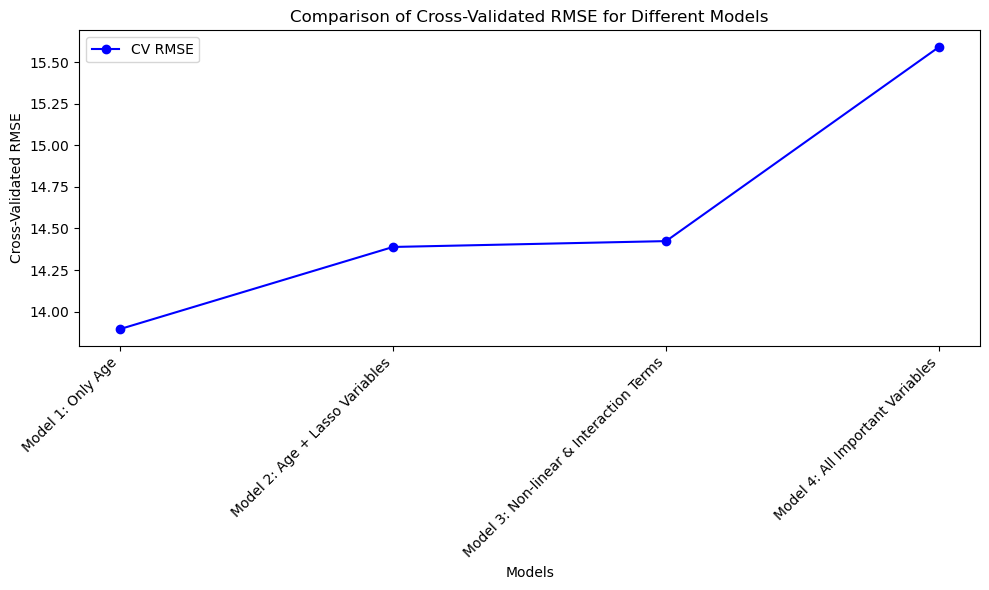

In [41]:
# Store the results in a list
models = ['Model 1: Only Age', 'Model 2: Age + Lasso Variables', 
          'Model 3: Non-linear & Interaction Terms', 'Model 4: All Important Variables']
cv_rmse_values = [cv_rmse1, cv_rmse2, cv_rmse3, cv_rmse4]

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the line chart
plt.plot(models, cv_rmse_values, marker='o', linestyle='-', color='b', label='CV RMSE')

# Set the y-axis limits to be between the min and max values of RMSE
plt.ylim(min(cv_rmse_values) - 0.1, max(cv_rmse_values) + 0.1)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Cross-Validated RMSE')
plt.title('Comparison of Cross-Validated RMSE for Different Models')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.legend()
plt.savefig("cv_rmse_comparison.png", dpi=300, bbox_inches="tight")

plt.show()


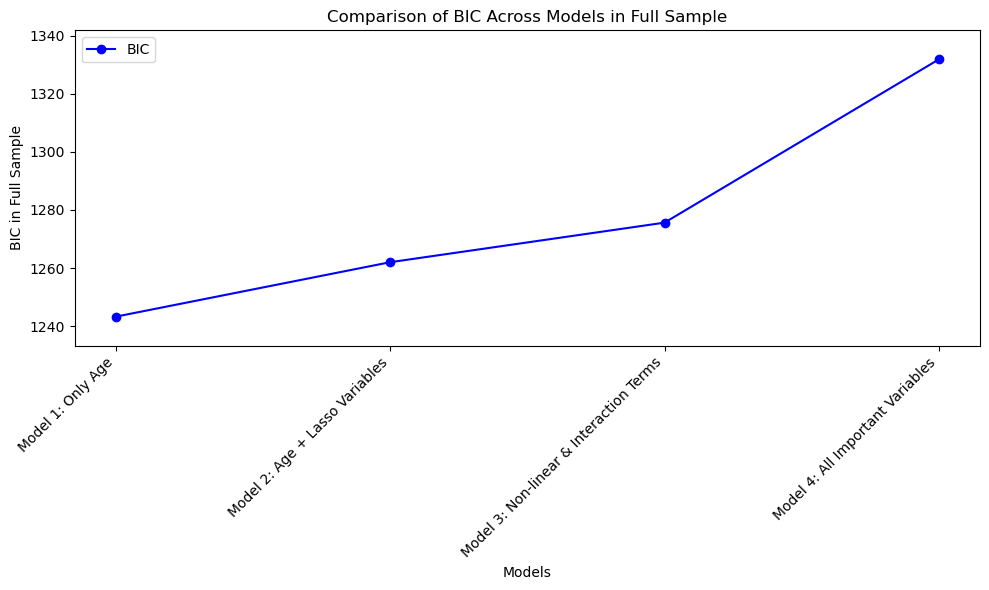

In [42]:
# Get BIC values for each model
bic1 = reg1.bic
bic2 = reg2.bic
bic3 = reg3.bic
bic4 = reg4.bic

# Store the results in a list
bic_values = [bic1, bic2, bic3, bic4]

# Model names
models = ['Model 1: Only Age', 'Model 2: Age + Lasso Variables', 
          'Model 3: Non-linear & Interaction Terms', 'Model 4: All Important Variables']

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the line chart
plt.plot(models, bic_values, marker='o', linestyle='-', color='b', label='BIC')

# Set the y-axis limits to be between the min and max values of BIC
plt.ylim(min(bic_values) - 10, max(bic_values) + 10)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('BIC in Full Sample')
plt.title('Comparison of BIC Across Models in Full Sample')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.legend()
plt.savefig("bic_comparison.png", dpi=300, bbox_inches="tight")

plt.show()


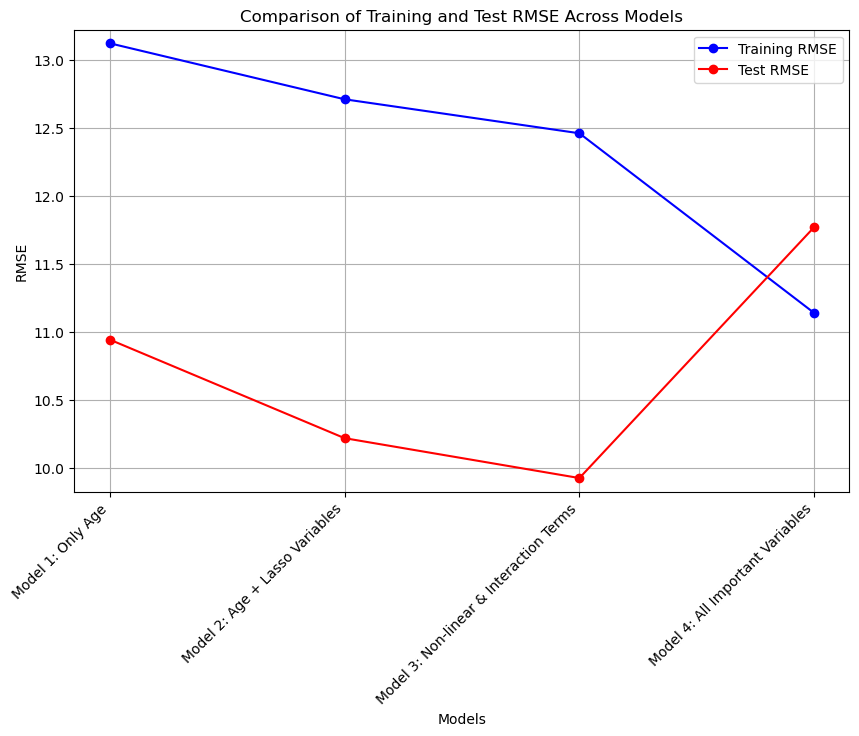

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting data into training and test sets
train_data, test_data = train_test_split(data_all_adjusted, test_size=0.2, random_state=42)

# Function to compute RMSE
def compute_rmse(model, train_data, test_data):
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    rmse_train = np.sqrt(mean_squared_error(train_data["w"], y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(test_data["w"], y_test_pred))

    return rmse_train, rmse_test

# Compute RMSE for each model
rmse_train_1, rmse_test_1 = compute_rmse(reg1, train_data, test_data)
rmse_train_2, rmse_test_2 = compute_rmse(reg2, train_data, test_data)
rmse_train_3, rmse_test_3 = compute_rmse(reg3, train_data, test_data)
rmse_train_4, rmse_test_4 = compute_rmse(reg4, train_data, test_data)

# Store the results
models = ['Model 1: Only Age', 'Model 2: Age + Lasso Variables', 
          'Model 3: Non-linear & Interaction Terms', 'Model 4: All Important Variables']
rmse_train_values = [rmse_train_1, rmse_train_2, rmse_train_3, rmse_train_4]
rmse_test_values = [rmse_test_1, rmse_test_2, rmse_test_3, rmse_test_4]

# Plot RMSE for Training and Test Samples
plt.figure(figsize=(10, 6))

plt.plot(models, rmse_train_values, marker='o', linestyle='-', color='blue', label='Training RMSE')
plt.plot(models, rmse_test_values, marker='o', linestyle='-', color='red', label='Test RMSE')

# Set y-axis limits
plt.ylim(min(min(rmse_train_values), min(rmse_test_values)) - 0.1, 
         max(max(rmse_train_values), max(rmse_test_values)) + 0.1)

# Labels and title
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Comparison of Training and Test RMSE Across Models")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display legend
plt.legend()
plt.grid(True)
plt.savefig("rmse_comparison_test_training.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


In [44]:
# Collect model evaluation metrics
results = {
    "Model": ["Model 1: Only Age", "Model 2: Age + Lasso Variables", 
              "Model 3: Non-linear & Interaction Terms", "Model 4: All Important Variables"],
    "RMSE (Train)": [rmse_train_1, rmse_train_2, rmse_train_3, rmse_train_4],  
    "RMSE (Test)": [rmse_test_1, rmse_test_2, rmse_test_3, rmse_test_4],  
    "CV RMSE": [cv_rmse1, cv_rmse2, cv_rmse3, cv_rmse4],  
    "BIC": [bic1, bic2, bic3, bic4],  
    "R-Squared": [reg1.rsquared, reg2.rsquared, reg3.rsquared, reg4.rsquared]  
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Save the table as Excel
results_df.to_excel("model_comparison.xlsx", index=False)  # Save as Excel

# Display the table
print(results_df)


                                     Model  RMSE (Train)  RMSE (Test)  \
0                        Model 1: Only Age     13.120987    10.943258   
1           Model 2: Age + Lasso Variables     12.709421    10.218916   
2  Model 3: Non-linear & Interaction Terms     12.459489     9.925698   
3         Model 4: All Important Variables     11.138388    11.770364   

     CV RMSE          BIC  R-Squared  
0  13.894738  1243.271436   0.274400  
1  14.388863  1262.022587   0.326327  
2  14.424096  1275.643453   0.354214  
3  15.592788  1331.886089   0.430220  
